In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [36]:
data = pd.read_csv("./Student_Performance.csv")
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [37]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

Text(0, 0.5, 'Performance Index')

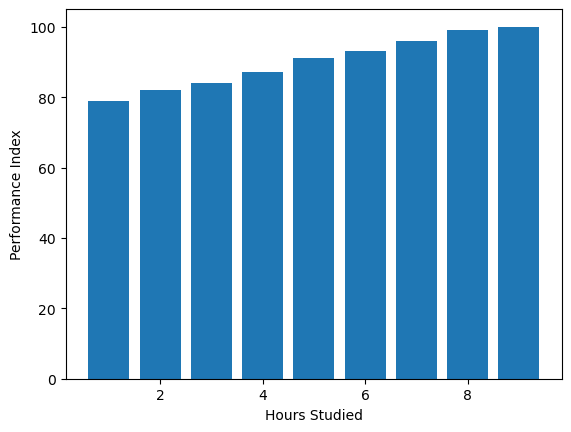

In [38]:
plt.bar(data["Hours Studied"], data["Performance Index"])
plt.xlabel("Hours Studied")
plt.ylabel("Performance Index")

Text(0, 0.5, 'Performance Index')

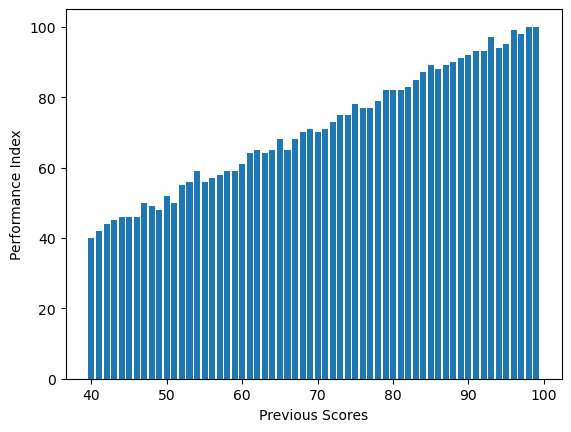

In [39]:
plt.bar(data["Previous Scores"], data["Performance Index"])
plt.xlabel("Previous Scores")
plt.ylabel("Performance Index")

Text(0, 0.5, 'Performance Index')

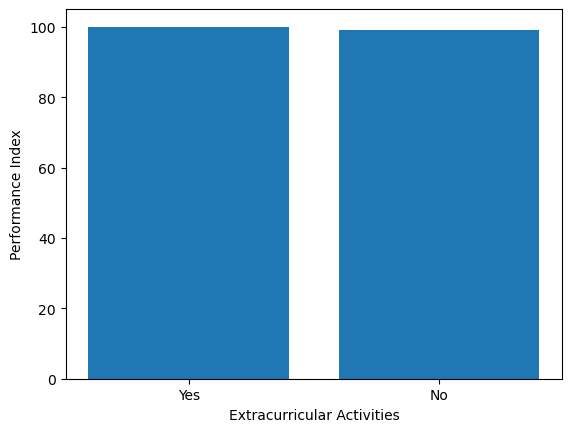

In [40]:
plt.bar(data["Extracurricular Activities"], data["Performance Index"])
plt.xlabel("Extracurricular Activities")
plt.ylabel("Performance Index")

Text(0, 0.5, 'Performance Index')

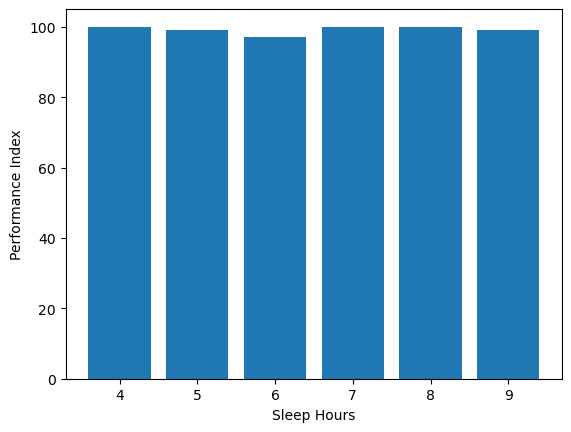

In [41]:
plt.bar(data["Sleep Hours"], data["Performance Index"])
plt.xlabel("Sleep Hours")
plt.ylabel("Performance Index")

Text(0, 0.5, 'Performance Index')

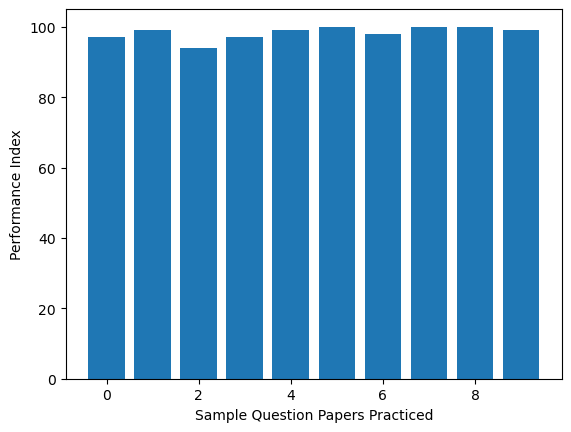

In [42]:
plt.bar(data["Sample Question Papers Practiced"], data["Performance Index"])
plt.xlabel("Sample Question Papers Practiced")
plt.ylabel("Performance Index")

<Axes: >

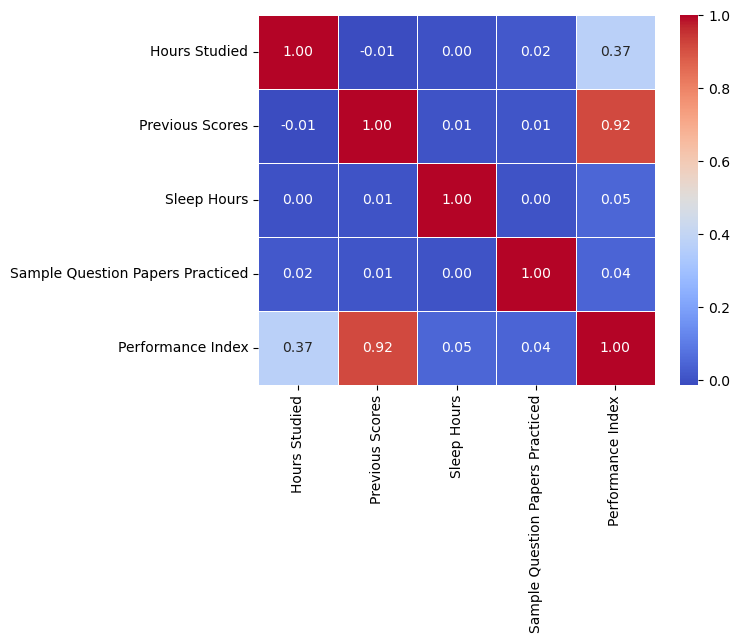

In [43]:
sns.heatmap(data.drop("Extracurricular Activities", axis=1).corr(), cmap="coolwarm", annot=True, fmt="0.2f", linewidths=0.5)

In [54]:
X = data[:int(.8 * len(data))][["Hours Studied", "Previous Scores"]]
Y = data[:int(.8 * len(data))]["Performance Index"]
X.head()

,Hours Studied,Previous Scores
0,7,99
1,4,82
2,8,51
3,5,52
4,7,75


In [55]:
X = np.array(X, dtype=float)
X = np.c_[np.ones(X.shape[0]), X]
Y = np.array(Y, dtype=float)

coefficients = np.linalg.pinv(X.T @ X) @ X.T @ Y
print(f"coefficients for the linear regression equation: {coefficients}")

coefficients for the linear regression equation: [-29.82632662   2.85655963   1.01902855]


In [56]:
def testing(x):
    return coefficients[0] +(coefficients[1] * x[0]) + (coefficients[2] * x[1])

In [57]:
X = np.array(data[int(.8 * len(data)):][["Hours Studied", "Previous Scores"]], dtype=float)
Y = np.array(data[int(.8 * len(data)):]["Performance Index"], dtype=float)

predicts = []
for i in X:
    predicts.append(testing(i))
mse = np.mean((predicts - Y) ** 2)
rmse = math.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 5.383627302493802
Root Mean Squared Error: 2.3202644897713283


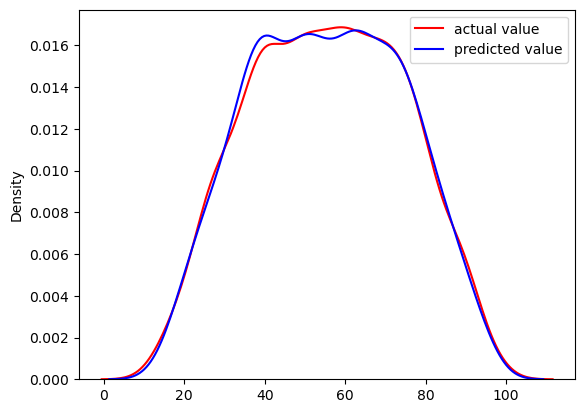

In [58]:
ax = sns.kdeplot(np.array(Y), color='red', label='actual value')
sns.kdeplot(predicts, color='blue', label='predicted value', ax=ax)
plt.legend()